In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 256
ny = 256


class ImageCustomProvider(image_util.ImageDataProvider):
    def _find_data_files(self, search_path):
        if isinstance(search_path, list):
            all_files = []
            for path in search_path:
                all_files.extend(glob.glob(path))
        else:
            all_files = glob.glob(search_path)
            
        return [name for name in all_files if not self.mask_suffix in name]

In [4]:
train_dir = '../../train_test_data/train0/*'

generator = ImageCustomProvider([train_dir + '_histeq.tif', train_dir + '_segmentation.tif' ], data_suffix=u'_histeq.tif', mask_suffix=u'_segmentation.tif')
train_data, labels = generator._next_data()
print(generator.data_files[generator.file_idx])

Number of files used: 1800
../../train_test_data/train0/ISIC_0013129_histeq.tif


In [5]:
x_test, y_test = generator(10)

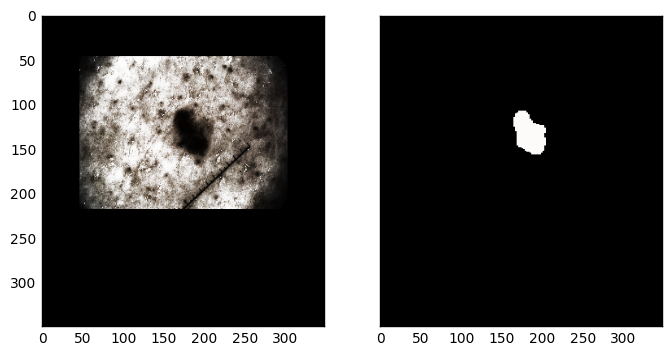

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,:], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=4, features_root=20)

2017-03-30 00:22:09,467 Layers 4, features 20, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="adam")

In [9]:
path = trainer.train(generator, "./unet_trained", training_iters=100, epochs=100, display_step=5)

2017-03-30 00:22:11,424 Removing '/home/bill/Desktop/course/syde522/proj/lesion-segmentation/unets/prediction'
2017-03-30 00:22:11,425 Removing '/home/bill/Desktop/course/syde522/proj/lesion-segmentation/unets/unet_trained'
2017-03-30 00:22:11,426 Allocating '/home/bill/Desktop/course/syde522/proj/lesion-segmentation/unets/prediction'
2017-03-30 00:22:11,427 Allocating '/home/bill/Desktop/course/syde522/proj/lesion-segmentation/unets/unet_trained'
2017-03-30 00:22:16,888 Verification error= 92.6%, loss= 0.7134
2017-03-30 00:22:17,298 Start optimization
2017-03-30 00:22:20,634 Iter 0, Minibatch Loss= 0.6483, Training Accuracy= 0.9802, Minibatch error= 2.0%
2017-03-30 00:22:33,442 Iter 5, Minibatch Loss= 0.5266, Training Accuracy= 0.9921, Minibatch error= 0.8%
2017-03-30 00:22:46,062 Iter 10, Minibatch Loss= 0.7536, Training Accuracy= 0.5366, Minibatch error= 46.3%
2017-03-30 00:22:58,668 Iter 15, Minibatch Loss= 0.5323, Training Accuracy= 0.8063, Minibatch error= 19.4%
2017-03-30 00:23:

In [10]:
prediction = net.predict("./unet_trained/model.cpkt", x_test)
print(prediction.shape, np.max(prediction[0,...,1]), np.min(prediction[0,...,1]))

2017-03-30 13:01:15,503 Model restored from file: ./unet_trained/model.cpkt


(10, 260, 260, 2) 0.934798 3.27342e-07
